<a href="https://colab.research.google.com/github/james-monahan/Code-school-notebooks/blob/main/Checkpoint-3/Checkpoint_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pyforest

  Created wheel for pyforest: filename=pyforest-1.0.3-py2.py3-none-any.whl size=13716 sha256=10aa873ca0020f99fb00d8e6b470cb2ac7f3d73b4979e1df416d14fd04a29769
  Stored in directory: /root/.cache/pip/wheels/af/0b/39/340a7f15fc8d4ff5ab50847b28789afea04452a9d51b9721b5
Successfully built pyforest


In [ ]:
from pyforest import *

Les durées sont indicatives et dépendent évidemment de chacun. Si tu vois que tu n'arrives pas à finir une partie dans les temps, n'hésite pas à passer à la partie suivante.

Si tu n'as pas le temps de tout finir, tu pourras reprendre ce checkpoint ce week-end ou la semaine prochaine. Tu indiqueras simplement en commentaire les scripts que tu as complété a posteriori.

# Partie 1 : Data exploration et processing - environ 30 min

Exécute le code ci-dessous. Tu obtiendras un DataFrame avec 10 000 commentaires de restaurants. 
- date : la date du commentaire
- stars : la note attribuée (de 1 à 5)
- text : le texte du commentaire
- type : review
- useful : le nombre d'utilisateur ayant indiqué ce commentaire comme "utile"
- suivent ensuite 27 colonnes indiquant le nombre d'occurences de certains mots dans le commentaire.

Le but de ce checkpoint sera d'explorer ce dataset, puis de proposer un modèle de prédiction de note positive en fonction des autres variables.

Commence par vérifier qu'il n'y a pas de valeur manquante.

In [ ]:
import pandas as pd
df_restaurants = pd.read_csv("https://github.com/murpi/wilddata/raw/master/quests/restaurant.zip", index_col='Unnamed: 0')
df_restaurants.head()

,date,stars,text,type,useful,came,made,happy,definitely,another,love,give,new,asked,bad,still,sauce,table,every,around,amazing,minutes,'ll,friendly,day,delicious,fresh,something,said,ok,'d,lunch
0,2011-01-26,5,My wife took me here on my birthday for breakf...,review,5,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0
1,2011-07-27,5,I have no idea why some people give bad review...,review,0,1,0,0,0,0,0,1,0,0,3,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0
2,2012-06-14,4,love the gyro plate. Rice is so good and I als...,review,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2010-05-27,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2012-01-05,5,General Manager Scott Petello is a good egg!!!...,review,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
df_restaurants.isna().sum().sum()

0

## Colonne "useful"

Trace un histogramme et un boxplot afin de représenter la distribution de cette variable.

Les données sont-elles bien réparties ?

In [ ]:
df_restaurants.shape

(10000, 32)

In [ ]:
df_restaurants['useful'].value_counts()[:10]

0    4130
1    2848
2    1323
3     711
4     335
5     222
6     114
7      91
8      52
9      38
Name: useful, dtype: int64

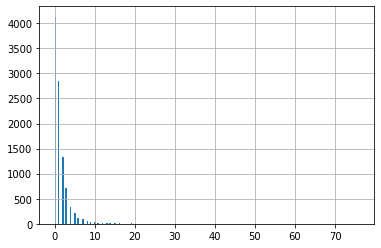

In [ ]:
df_restaurants['useful'].hist(bins=200)

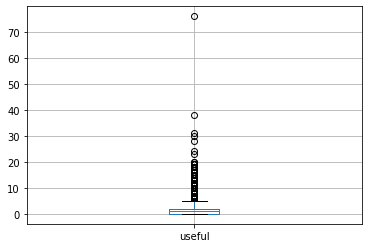

In [ ]:
df_restaurants.boxplot('useful')

In [ ]:
#about half the ratings have at least 1 mark, the one's with many marks are shown as outliers

## Colonne "text"

Utilise **apply** pour créer une nouvelle colonne "len_text", indiquant la longueur (le nombre de caractères) de chacun des commentaires.

Trace un histogramme et un boxplot afin de représenter la distribution de cette colonne "len_text". Les valeurs sont-elles bien réparties ? La plupart des commentaires sont-ils plutôt longs ou courts ?

In [ ]:
df_restaurants["len_text"] = df_restaurants['text'].apply(len)

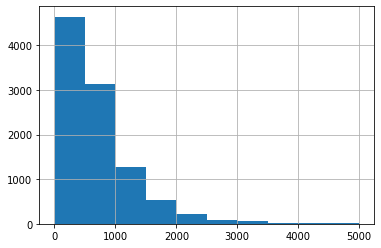

In [ ]:
df_restaurants["len_text"].hist()

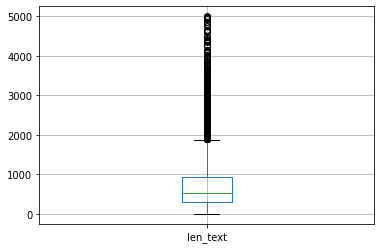

In [ ]:
df_restaurants.boxplot('len_text')

In [ ]:
#distribution is skewed right with many reviews being short

## Colonne "stars"

- Trace un scatterplot pour comparer la colonne "useful" et la colonne "stars". Te semble-t-il y avoir une corrélation ? 

- Idem entre "len_text" et "stars".

- Trace une heatmap de corrélation pour l'ensemble du DataFrame. Pense à prendre une échelle de couleur divergente centrée sur 0. Y a-t-il des fortes corrélations dans ce dataset ?



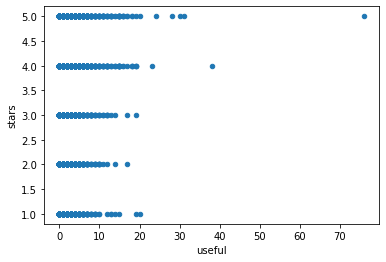

In [ ]:
df_restaurants.plot.scatter('useful', 'stars')

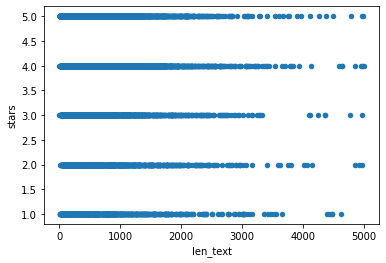

In [ ]:
df_restaurants.plot.scatter('len_text', 'stars')

In [ ]:
#I don't see any strong correlations

<IPython.core.display.Javascript object>

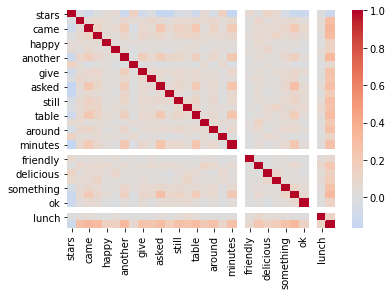

In [ ]:
sns.heatmap(df_restaurants.corr(),center=0, cmap='coolwarm')

## Target

Crée une colonne "bad_good" qui contiendra :
- "bad" si la note (stars) vaut 1, 2 ou 3 
- "good" si la note (stars) vaut 4 ou 5

Cette nouvelle colonne sera notre "target".

In [ ]:
map = {1:'bad', 2:'bad', 3:'bad', 4:'good', 5:'good'}

df_restaurants['target'] = df_restaurants['stars'].map(map)
df_restaurants['target']

0       good
1       good
2       good
3       good
4       good
        ... 
9995     bad
9996    good
9997    good
9998     bad
9999    good
Name: target, Length: 10000, dtype: object

# Partie 2 : Machine learning (classification supervisée) - environ 1h

Commence par définir X et y.
- X contiendra toutes les colonnes numériques **SAUF "stars" !** (soit 29 colonnes)
- y sera la colonne "bad_good"


In [ ]:
df_restaurants.columns

Index(['date', 'stars', 'text', 'type', 'useful', 'came', 'made', 'happy',
       'definitely', 'another', 'love', 'give', 'new', 'asked', 'bad', 'still',
       'sauce', 'table', 'every', 'around', 'amazing', 'minutes', ''ll',
       'friendly', 'day', 'delicious', 'fresh', 'something', 'said', 'ok',
       ''d', 'lunch', 'len_text', 'target'],
      dtype='object')

In [ ]:
X = df_restaurants.select_dtypes('int64').drop('stars', axis=1)
print(X.shape)

y = df_restaurants['target']
print(y.shape)

(10000, 29)
(10000,)


## Mise à l'échelle

Standardise toutes les données, et enregistre le résultat dans "X_scaled".

In [ ]:
scaler = sklearn.preprocessing.StandardScaler()

<IPython.core.display.Javascript object>

In [ ]:
X_scaled = scaler.fit_transform(X)

## Train test split

Effectue un train test split sur `X_scaled` et `y` avec `random_state = 32`

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.33, random_state=32)

<IPython.core.display.Javascript object>

## Régression logistique

Entraine une régression logistique sur ton jeu d'entrainement, puis compare les accuracy scores des jeux d'entrainement et de test. Y a-t-il de l'overfitting ? Les scores sont-ils bons ?

Affiche également une matrice de confusion pour le jeu de test. Combien y a-t-il de commentaires "bad" correctement prédits ?

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, classification_report

train data: 0.7270149253731343
test data: 0.7403030303030304


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

              precision    recall  f1-score   support

         bad       0.66      0.29      0.40       998
        good       0.75      0.94      0.83      2302

    accuracy                           0.74      3300
   macro avg       0.71      0.61      0.62      3300
weighted avg       0.72      0.74      0.70      3300



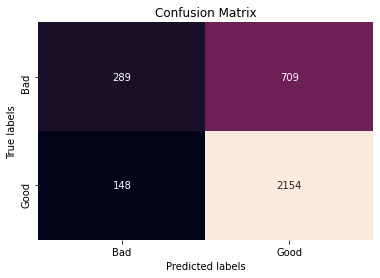

In [ ]:
LM = LogisticRegression()

model = LM.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("train data:",model.score(X_train, y_train))
print("test data:",model.score(X_test, y_test))

cm = confusion_matrix(y_test, y_pred)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt='d', cbar=False) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Bad', 'Good']); ax.yaxis.set_ticklabels(['Bad', 'Good'])

print(classification_report(y_test, y_pred))

In [ ]:
y_test.value_counts()

good    2302
bad      998
Name: target, dtype: int64

In [ ]:

# scores aren't amazing, but does not appear to overfit
#'bad' is correctly predicted 289 times

## Decision tree

Entraine un arbre de décision sur ton jeu d'entrainement, puis compare les accuracy scores des jeux d'entrainement et de test. Y a-t-il de l'overfitting ? Les scores sont-ils bons ?

Affiche également une matrice de confusion pour le jeu de test. Combien y a-t-il de commentaires "bad" correctement prédits ?

In [ ]:
from sklearn.tree import DecisionTreeClassifier
modelDTC = DecisionTreeClassifier()
modelDTC.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

train data: 0.9795522388059702
test data: 0.6287878787878788


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

              precision    recall  f1-score   support

         bad       0.40      0.45      0.42       998
        good       0.75      0.71      0.73      2302

    accuracy                           0.63      3300
   macro avg       0.57      0.58      0.58      3300
weighted avg       0.64      0.63      0.63      3300



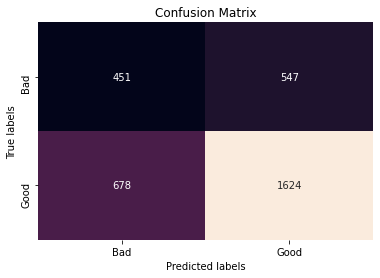

In [ ]:

print("train data:",modelDTC.score(X_train, y_train))
print("test data:",modelDTC.score(X_test, y_test))
y_pred = modelDTC.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt='d', cbar=False) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Bad', 'Good']); ax.yaxis.set_ticklabels(['Bad', 'Good'])

print(classification_report(y_test, y_pred))

In [ ]:
#model is overfitting
#451 bad predicted correctly

## Decision tree - hyperparamètres

Change les paramètres du modèle pour réduire l'overfitting. Arrives-tu à un meilleur score qu'avec la régression logistique ?

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
DTF = DecisionTreeClassifier()

params = {
          # 'ccp_alpha':, 
          # 'class_weight':, 
          'criterion': ['gini', 'entropy'],
          'max_depth': [2, 3, 5, 10], 
          # 'max_features':, 
          'max_leaf_nodes': [None, 10, 20, 50],    
          # 'min_impurity_decrease':, 
          # 'min_impurity_split':,
          'min_samples_leaf':[1, 3, 5, 10] 
          # 'min_samples_split':,
          # 'min_weight_fraction_leaf':, 
          # 'random_state':,
          # 'splitter':
          }

In [ ]:
# cv, so just passing x and y

In [ ]:
clf = GridSearchCV(param_grid=params, estimator=DTF)
clf.fit(X_scaled, y)

GridSearchCV(cv=None, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                

In [ ]:
print(clf.best_score_)
print(clf.best_params_)

0.7192000000000001
{'criterion': 'entropy', 'max_depth': 10, 'max_leaf_nodes': 50, 'min_samples_leaf': 10}


In [ ]:
#about the same as logistic regression

## Question bonus (optionnelle)

Utilise gridsearch pour trouver les meilleurs paramètres

In [ ]:
#already done

# Partie 3 : NLP - Sentiment analysis - environ 1h

Définis une nouvelle variable `X_text` qui ne contiendra que la colonne `text`. y reste identique. 


In [ ]:
df_restaurants['X_text'] = df_restaurants['text']

## Crée une fonction de nettoyage des stopwords et de la ponctuation

Tu peux appeler ta fonction `func_clean`.
Ta fonction doit prendre un `str` en unique paramètre, et retourner un `str`.

Par exemple :

`func_clean("Hello, how are you?")`

`>>> 'hello fine thank'`

In [ ]:
import string
import nltk
nltk.download('popular')

In [ ]:
def clean_text(df, col, col_name, stop_lang):
  stop_words = nltk.corpus.stopwords.words(stop_lang)
  # stop_words.remove('sample')
  #currently eliminating hyphens
  df[col_name] = df[col] \
          .apply(lambda x: "".join([s.translate(str.maketrans('', '', string.punctuation)) for s in x]))

  df[col_name] = df[col_name].str.lower()

  df[col_name] = df[col_name] \
          .apply(lambda x: " ".join([val for val in x.split() if val not in stop_words]))

## Applique cette fonction 

Applique cette fonction à `X_text` et enregistre le résultat dans `X_clean`.

In [ ]:
clean_text(df=df_restaurants, col='X_text', col_name='X_clean', stop_lang="english")


In [ ]:
df_restaurants[['X_text', 'X_clean']].head()

,X_text,X_clean
0,My wife took me here on my birthday for breakf...,wife took birthday breakfast excellent weather...
1,I have no idea why some people give bad review...,idea people give bad reviews place goes show p...
2,love the gyro plate. Rice is so good and I als...,love gyro plate rice good also dig candy selec...
3,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",rosie dakota love chaparral dog park convenien...
4,General Manager Scott Petello is a good egg!!!...,general manager scott petello good egg go deta...


## Train test split

Découpe tes données `X_clean` et `y` avec un train test split, et le même `random_state = 32`.



In [ ]:
X = df_restaurants['X_clean']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=32)

<IPython.core.display.Javascript object>

## TfidfVectorizer

- Entraine `TfidfVectorizer` sur `X_train` 
- Transforme avec ton vectorizer `X_train` et stocke le résultat dans `X_train_vecto`.
- Transforme avec ton vectorizer `X_test` et stocke le résultat dans `X_test_vecto`.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
type(X_test)

pandas.core.series.Series

In [ ]:
tfidf = TfidfVectorizer()

In [ ]:
tfidf.fit(X_train)
X_train_vecto = tfidf.transform(X_train)
X_test_vecto = tfidf.transform(X_test)

X_train_vecto = X_train_vecto.todense()
X_test_vecto = X_test_vecto.todense()

In [ ]:

X_train_vecto = pd.DataFrame(X_train_vecto)
X_test_vecto = pd.DataFrame(X_test_vecto)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
X_train_vecto.shape, X_test_vecto.shape, y_train.shape, y_test.shape

((6700, 29247), (3300, 29247), (6700,), (3300,))

## Régression logistique

Entraine une régression logistique sur `X_train_vecto` et `y_train`.

Compare les accuracy scores des jeux d'entrainement et de test. Y a-t-il de l'overfitting ? Les scores sont-ils meilleurs que dans tes modèles du début du checkpoint ?

Affiche également une matrice de confusion pour le jeu de test. Combien y a-t-il de commentaires "bad" correctement prédits ?

In [ ]:
LM_nlp = LogisticRegression()
model_nlp = LM_nlp.fit(X_train_vecto, y_train)

train data: 0.8970149253731343
test data: 0.8303030303030303


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

              precision    recall  f1-score   support

         bad       0.83      0.55      0.66       998
        good       0.83      0.95      0.89      2302

    accuracy                           0.83      3300
   macro avg       0.83      0.75      0.78      3300
weighted avg       0.83      0.83      0.82      3300



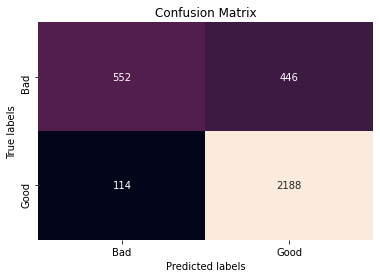

In [ ]:
y_pred = model_nlp.predict(X_test_vecto)

print("train data:",model_nlp.score(X_train_vecto, y_train))
print("test data:",model_nlp.score(X_test_vecto, y_test))

cm = confusion_matrix(y_test, y_pred)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt='d', cbar=False) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Bad', 'Good']); ax.yaxis.set_ticklabels(['Bad', 'Good'])

print(classification_report(y_test, y_pred))

In [ ]:
#better results, overfitting a bit

# Partie 4 : WebScraping - environ 1h30

Effectue un webscraping des titres d'annonces et des prix de la page suivante : https://www.amazon.fr/s?k=ski&i=sports
Essaye d'afficher le résultat dans un DataFrame.  Il doit y avoir 40 ou 41 annonces sur la page.

Voici un exemple de résultat attendu (évidemment, les annonces bougent tous les jours, tu auras donc un résultat différent).






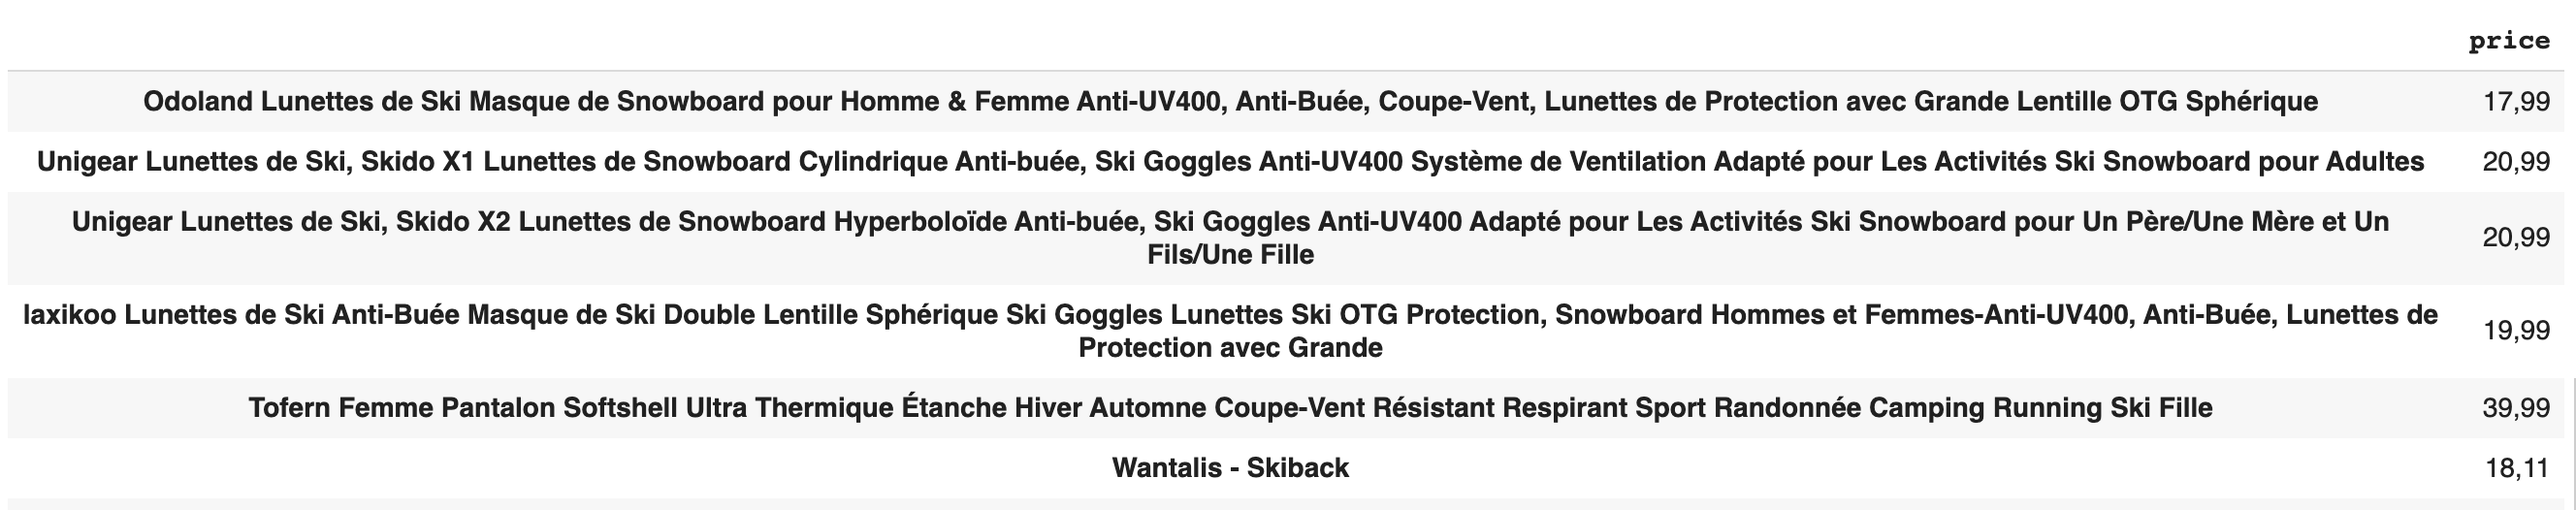

In [ ]:
import requests
from bs4 import BeautifulSoup

In [ ]:
navigator = 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_1)'
url = "https://www.amazon.fr/s?k=ski&i=sports"
r = requests.get(url, headers={'User-Agent': navigator})

In [ ]:
soup = BeautifulSoup(r.content, 'html.parser')

In [ ]:
titles = soup.find_all(class_="a-size-base-plus a-color-base a-text-normal")
prices = soup.find_all(class_="a-price-whole")

title = []
price = []

for t in titles:
    title.append(t.get_text())

for p in prices:
    price.append(p.get_text())

df = pd.DataFrame({'titles' : title, 'prices': price})
df.head()    

<IPython.core.display.Javascript object>

,titles,prices
0,Wantalis - Skiback,"18,11"
1,MOBIUSPHY sous-Vêtement Thermique Homme Ensemb...,"27,99"
2,SKEY Lunettes de Ski Magnétique Masque de Ski ...,"32,99"
3,THERMIC T48-0200-001 Séche chaussures thermiqu...,"39,99"
4,"Ltrototea Gants de ski, gants d'hiver chauds p...","14,99"
